In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np

def load_data_files():
    movies = pd.read_csv("../moviedata/movies.csv")
    ratings = pd.read_csv("../moviedata/ratings.csv")
    return movies, ratings

movies, ratings = load_data_files()

MemoryError: Unable to allocate 774. MiB for an array with shape (3, 33832162) and data type int64

In [56]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [57]:
movies.drop_duplicates("title", inplace=True)




In [ ]:
# set_of_genres=set()

# for j in movies.index:    
#     lista=movies["genres"][j].split("|")
#     for word in lista:
#         set_of_genres.add(word)

# print(set_of_genres)

# number_of_genres=len(set_of_genres)
# number_of_genres

{'Adventure', 'Crime', 'Comedy', 'Horror', 'IMAX', 'Children', 'Action', 'Western', 'Animation', 'Thriller', 'Film-Noir', 'War', 'Musical', 'Sci-Fi', 'Romance', 'Mystery', '(no genres listed)', 'Drama', 'Documentary', 'Fantasy'}


20

In [ ]:
# for k in set_of_genres:
#     movies[k]=np.where(movies["genres"].str.contains(k),1,0)
# movies.drop(columns="genres", inplace=True)

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_7900\3840803712.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movies[k]=np.where(movies["genres"].str.contains(k),1,0)


In [58]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
merged = ratings.merge(movies, on="movieId")

In [60]:

merged.head()
merged.sort_values(by="title")


,userId,movieId,rating,timestamp,title,genres
23035454,224495,210479,3.0,1625895447,(2019),Drama|Thriller
10676290,105053,210479,3.0,1680216664,(2019),Drama|Thriller
7771703,76277,210479,2.0,1595219357,(2019),Drama|Thriller
4787407,46514,210479,3.0,1684612062,(2019),Drama|Thriller
31030480,303543,210479,4.0,1583734476,(2019),Drama|Thriller
...,...,...,...,...,...,...
25282946,246709,130640,3.0,1536273435,貞子3D (2012),Horror
22116044,215676,130640,0.5,1529659695,貞子3D (2012),Horror
16059893,157613,205915,3.5,1644182947,过昭关,(no genres listed)
27419167,267654,157314,5.0,1461315340,줄탁동시 (2012),(no genres listed)


In [61]:
merged=merged[merged["timestamp"]%2==0]

In [62]:
merged.head()

,userId,movieId,rating,timestamp,title,genres
1,1,110,4.0,1225865086,Braveheart (1995),Action|Drama|War
3,1,260,4.5,1225735204,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,1,596,4.0,1225733524,Pinocchio (1940),Animation|Children|Fantasy|Musical
7,1,1036,5.0,1225735626,Die Hard (1988),Action|Crime|Thriller
12,1,1210,4.5,1225735210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi


In [86]:
x = merged.groupby("userId").count()
print(x)
x = x[(x["rating"]>80) & (x["rating"]<150)]
expert_users=x.index
merged_xu = merged[merged["userId"].isin(expert_users)]



        movieId  rating  timestamp  title  genres
userId                                           
1            22      22         22     22      22
2            42      42         42     42      42
3            14      14         14     14      14
4            11      11         11     11      11
5            17      17         17     17      17
...         ...     ...        ...    ...     ...
330971       24      24         24     24      24
330972       74      74         74     74      74
330973       10      10         10     10      10
330974       53      53         53     53      53
330975      161     161        161    161     161

[320850 rows x 5 columns]


In [64]:
merged_xu

,userId,movieId,rating,timestamp,title,genres
304,7,1,4.0,974518024,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
307,7,21,2.0,974518824,Get Shorty (1995),Comedy|Crime|Thriller
308,7,25,3.0,974519270,Leaving Las Vegas (1995),Drama|Romance
310,7,36,4.0,974523072,Dead Man Walking (1995),Crime|Drama
319,7,281,4.0,974520792,Nobody's Fool (1994),Comedy|Drama|Romance
...,...,...,...,...,...,...
33827679,330967,6966,2.0,1082358820,Darkman (1990),Action|Crime|Fantasy|Sci-Fi|Thriller
33827680,330967,7004,2.0,1082357816,Kindergarten Cop (1990),Action|Comedy|Crime|Thriller
33827682,330967,7017,3.0,1082358926,Passenger 57 (1992),Action|Thriller
33827683,330967,7153,4.5,1082356922,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


In [65]:
merged_xu.head()

,userId,movieId,rating,timestamp,title,genres
304,7,1,4.0,974518024,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
307,7,21,2.0,974518824,Get Shorty (1995),Comedy|Crime|Thriller
308,7,25,3.0,974519270,Leaving Las Vegas (1995),Drama|Romance
310,7,36,4.0,974523072,Dead Man Walking (1995),Crime|Drama
319,7,281,4.0,974520792,Nobody's Fool (1994),Comedy|Drama|Romance


In [66]:
y = merged_xu.groupby("title").count()["rating"]>300
pop_films=y[y].index

merged_xu_pf = merged_xu[merged_xu["title"].isin(pop_films)]

In [67]:
merged_xu_pf.head()

,userId,movieId,rating,timestamp,title,genres
304,7,1,4.0,974518024,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
307,7,21,2.0,974518824,Get Shorty (1995),Comedy|Crime|Thriller
308,7,25,3.0,974519270,Leaving Las Vegas (1995),Drama|Romance
310,7,36,4.0,974523072,Dead Man Walking (1995),Crime|Drama
319,7,281,4.0,974520792,Nobody's Fool (1994),Comedy|Drama|Romance


In [68]:
merged_xu_pf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369104 entries, 304 to 33827684
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 126.5+ MB


In [69]:
set_of_genres=set()

for j in movies.index:    
    lista=movies["genres"][j].split("|")
    for word in lista:
        set_of_genres.add(word)

print(set_of_genres)

number_of_genres=len(set_of_genres)
number_of_genres

{'Adventure', 'Film-Noir', 'Action', 'Documentary', 'Crime', 'Animation', 'Fantasy', 'Mystery', '(no genres listed)', 'Horror', 'Sci-Fi', 'Children', 'Western', 'Comedy', 'Musical', 'IMAX', 'Romance', 'Drama', 'War', 'Thriller'}


20

In [70]:
# Tar ca 3 minuter
for k in set_of_genres:
    merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_17916\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)
C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_17916\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf[k]=np.where(merged_xu_pf["genres"].str.contains(k),1,0)
C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_17916\4268190713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [71]:
merged_xu_pf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2369104 entries, 304 to 33827684
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   movieId             int64  
 2   rating              float64
 3   timestamp           int64  
 4   title               object 
 5   genres              object 
 6   Adventure           int64  
 7   Film-Noir           int64  
 8   Action              int64  
 9   Documentary         int64  
 10  Crime               int64  
 11  Animation           int64  
 12  Fantasy             int64  
 13  Mystery             int64  
 14  (no genres listed)  int64  
 15  Horror              int64  
 16  Sci-Fi              int64  
 17  Children            int64  
 18  Western             int64  
 19  Comedy              int64  
 20  Musical             int64  
 21  IMAX                int64  
 22  Romance             int64  
 23  Drama               int64  
 24  War                 int64 

In [72]:
merged_xu_pf.drop(columns=["timestamp", "movieId", "genres"], inplace=True)
merged_xu_pf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2369104 entries, 304 to 33827684
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   userId              int64  
 1   rating              float64
 2   title               object 
 3   Adventure           int64  
 4   Film-Noir           int64  
 5   Action              int64  
 6   Documentary         int64  
 7   Crime               int64  
 8   Animation           int64  
 9   Fantasy             int64  
 10  Mystery             int64  
 11  (no genres listed)  int64  
 12  Horror              int64  
 13  Sci-Fi              int64  
 14  Children            int64  
 15  Western             int64  
 16  Comedy              int64  
 17  Musical             int64  
 18  IMAX                int64  
 19  Romance             int64  
 20  Drama               int64  
 21  War                 int64  
 22  Thriller            int64  
dtypes: float64(1), int64(21), object(1)
memory usage: 433.8+ MB

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_17916\1783787764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_xu_pf.drop(columns=["timestamp", "movieId", "genres"], inplace=True)


In [73]:
merged_xu_pf.head()


,userId,rating,title,Adventure,Film-Noir,Action,Documentary,Crime,Animation,Fantasy,...,Sci-Fi,Children,Western,Comedy,Musical,IMAX,Romance,Drama,War,Thriller
304,7,4.0,Toy Story (1995),1,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0
307,7,2.0,Get Shorty (1995),0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
308,7,3.0,Leaving Las Vegas (1995),0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
310,7,4.0,Dead Man Walking (1995),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
319,7,4.0,Nobody's Fool (1994),0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [74]:
design_matrix = merged_xu_pf.pivot_table(index="title", columns=["userId"], values="rating")

design_matrix.fillna(0, inplace=True)
design_matrix

userId,7,9,10,21,35,50,51,57,94,105,...,330887,330920,330921,330931,330933,330934,330938,330947,330948,330967
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zootopia (2016),0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
titles_and_genres=merged_xu_pf.drop(columns=["userId", "rating"])
titles_and_genres.drop_duplicates(subset="title", inplace=True)



In [42]:
titles_and_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 304 to 407955
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1320 non-null   object
 1   Adventure           1320 non-null   int64 
 2   Film-Noir           1320 non-null   int64 
 3   Action              1320 non-null   int64 
 4   Documentary         1320 non-null   int64 
 5   Crime               1320 non-null   int64 
 6   Animation           1320 non-null   int64 
 7   Fantasy             1320 non-null   int64 
 8   Mystery             1320 non-null   int64 
 9   (no genres listed)  1320 non-null   int64 
 10  Horror              1320 non-null   int64 
 11  Sci-Fi              1320 non-null   int64 
 12  Children            1320 non-null   int64 
 13  Western             1320 non-null   int64 
 14  Comedy              1320 non-null   int64 
 15  Musical             1320 non-null   int64 
 16  IMAX                1320 

In [76]:
design_matrix.merge(titles_and_genres, on="title")

,title,7,9,10,21,35,50,51,57,94,...,Sci-Fi,Children,Western,Comedy,Musical,IMAX,Romance,Drama,War,Thriller
0,(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,0,0
1,10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
3,101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
4,101 Dalmatians (One Hundred and One Dalmatians...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,Zoolander (2001),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1897,Zootopia (2016),0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
1898,eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1899,xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
design_matrix["year"]=design_matrix.index.str[-5:-1]
design_matrix=design_matrix[design_matrix["year"].str.isnumeric()]


In [78]:
design_matrix["year"]=design_matrix["year"].astype(int)
design_matrix.head()

C:\Users\Björn ITHS\AppData\Local\Temp\ipykernel_17916\1355044037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design_matrix["year"]=design_matrix["year"].astype(int)


userId,7,9,10,21,35,50,51,57,94,105,...,330920,330921,330931,330933,330934,330938,330947,330948,330967,year
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1996
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1961


In [79]:
design_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, (500) Days of Summer (2009) to ¡Three Amigos! (1986)
Columns: 26436 entries, 7 to year
dtypes: float64(26435), int64(1)
memory usage: 383.0+ MB


In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

design_matrix.columns = design_matrix.columns.astype(str)

scaler = StandardScaler(with_mean=True, with_std=True)
design_matrix_scal = scaler.fit_transform(design_matrix)

scaler = MinMaxScaler()
design_matrix_scal_mm = scaler.fit_transform(design_matrix_scal)


In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1000)
design_matrix_scal_mm_pca=pca.fit_transform(design_matrix_scal_mm)


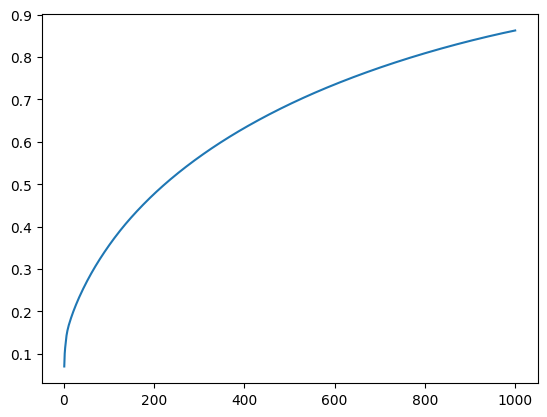

In [82]:
import matplotlib.pyplot as plt

pve=np.cumsum(pca.explained_variance_ratio_)

fig, ax=plt.figure(), plt.axes()
ax.plot(range(1, len(pve)+1), pve)


In [83]:
similarity_score = cosine_similarity(design_matrix_scal_mm_pca)
similarity_score

array([[ 1.        ,  0.0525775 ,  0.07328114, ..., -0.05424632,
        -0.04957843, -0.0571311 ],
       [ 0.0525775 ,  1.        , -0.01790964, ...,  0.08732207,
         0.06696049,  0.02577573],
       [ 0.07328114, -0.01790964,  1.        , ..., -0.02778704,
        -0.03782571, -0.02237516],
       ...,
       [-0.05424632,  0.08732207, -0.02778704, ...,  1.        ,
         0.17146924,  0.17713915],
       [-0.04957843,  0.06696049, -0.03782571, ...,  0.17146924,
         1.        ,  0.16055106],
       [-0.0571311 ,  0.02577573, -0.02237516, ...,  0.17713915,
         0.16055106,  1.        ]], shape=(1899, 1899))

In [84]:
def recommend(movie_title):
    index=np.where(design_matrix.index==movie_title)[0][0]
    print(index)
    similar_movies = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]
    data=[]

    for index, similarity in similar_movies:
        item = []
        temp_df = movies[movies["title"]==design_matrix.index[index]]
        item.extend(temp_df["title"].values)
        data.append(item)

    return data

In [85]:
recommend("Interstellar (2014)")

859


[['Inception (2010)'],
 ['The Martian (2015)'],
 ['Wolf of Wall Street, The (2013)'],
 ['Dark Knight Rises, The (2012)'],
 ['Arrival (2016)']]